In [9]:
import numpy as np

B = 100
N = 256
L = 500
n = range(0, L)
a4f2 = np.array((1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0))

In [10]:
from src.mathcad_api import MathcadAPI

mcad = MathcadAPI()

In [11]:

mass = np.array(mcad.rbinom(N, 1, 0.5))
massdv1n = np.array(n) - np.array(mcad.trunc(list(n), 2))
stek_ish = mcad.stack(massdv1n, a4f2, mass)
#print(len(stek_ish), len(massdv1n), len(a4f2), len(mass))
stek_bip = [x * 2 - 1 for x in stek_ish]

In [12]:
tau = 0.01
fd = 800
td = 1/fd
t = np.arange(0, tau * len(stek_bip) - td/2, td)
#for i in t: print(i)

In [13]:
import math
a_t_stek_bip = [stek_bip[math.floor(t_i/tau)] for t_i in t]
stek1_t_td = a_t_stek_bip

In [14]:
import matplotlib.pyplot as plt

nf = 49

zeros_arr = np.zeros((5, ), dtype=int)
stek_kon = mcad.stack(zeros_arr, stek1_t_td)
# print([i for i in stek_kon][:15])
n1 = range(0, len(stek_kon) - 1, 1)
fsr = 0.1

fn4 = mcad.lowpass(fsr, nf)
n2 = range(0, len(fn4) - 1, 1)

signal = np.convolve(fn4, stek_kon, "full")

for i in signal[:20]:
 print(i)

n3 = range(0, len(signal) - 1, 1)
sigma = 1
fdop = 0
fi = 0
fnes = 100

signal_real = [signal[x] * np.exp(-1j * 2 * math.pi * fdop * td * x) * np.exp(-1j * fi * x) for x in range(len(signal) - 1)]

pomexa1 = np.random.normal(0, sigma, len(signal_real) + 1)
pomexa2 = np.random.normal(0, sigma, len(signal_real) + 1)

I = [x.real for x in signal] + pomexa1
Q = [x.imag for x in signal] + pomexa2

n4 = range(280, 480+1)

0.0
0.0
0.0
0.0
0.0
-0.007795744031571998
-0.020957948007931253
-0.034718433983215925
-0.0436278557335839
-0.0436278557335839
-0.033780600114756115
-0.016962228367185955
0.0008454593655353873
0.02813056347603737
0.05445497142875586
0.06861181075377322
0.06314367798864282
0.037916120367287566
0.0012127130607476532
-0.032424030434392646


Text(0, 0.5, 'Q')

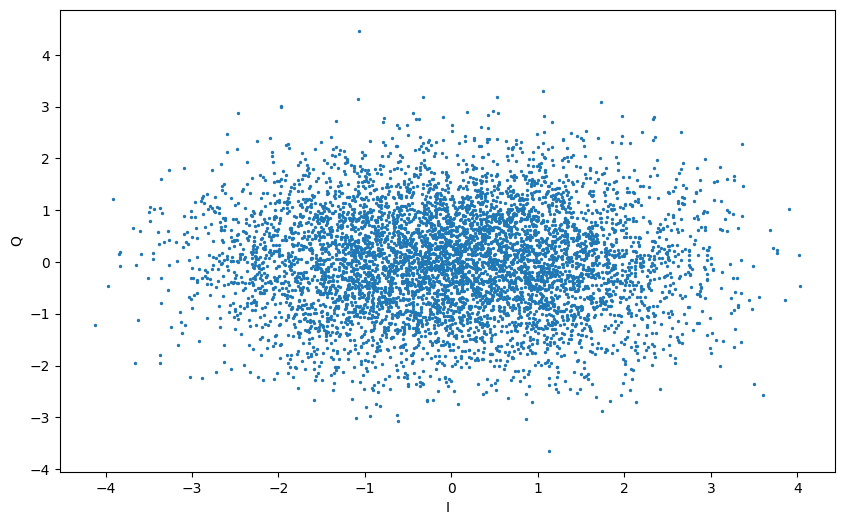

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=I, y=Q, s=2)
plt.xlabel("I")
plt.ylabel("Q")

Text(0.5, 0, 'mod(n4, 2*8)')

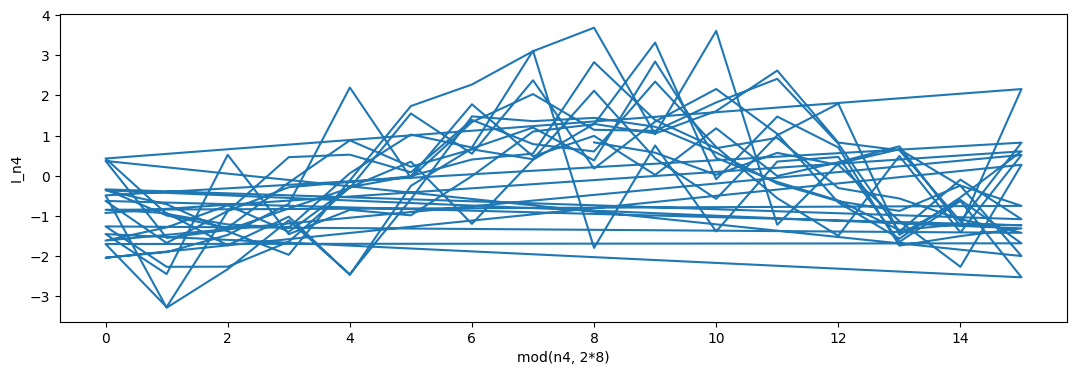

In [16]:
plt.figure(figsize=(13, 4))
plt.plot([i % (2*8) for i in n4], [I[i] for i in n4])
plt.ylabel("I_n4")
plt.xlabel("mod(n4, 2*8)")


Text(0.5, 0, 'n5')

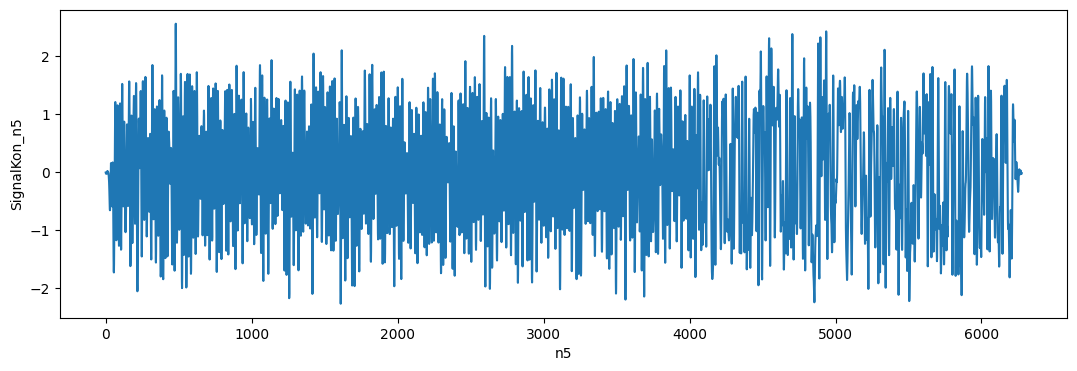

In [17]:
signal_kon = np.convolve(I, fn4, "full")
n5 = range(0, len(signal_kon) - 1)

plt.figure(figsize=(13, 4))
plt.plot(list(n5), [signal_kon[i] for i in n5])
plt.ylabel("SignalKon_n5")
plt.xlabel("n5")

In [18]:
semp = 8
por = 20

def symbolsyn(x):
    cm = 0
    cor = 0

    cor_nc = []
    det_ne = []
    ind = 0
    cor = 0
    acc_na = []
    
    global semp
    global por

    for i in range(0, len(x) - 1):
        if (i >= (2 * semp - 1)) and (((i - semp) % semp) == (semp - 1)):
            j = int(i + cor - 15)
            # print(cor)
            # print(i, semp, j, int(j + (semp / 2) - 1))
            s1 = sum(x[int(j): int(j + (semp / 2) - 1)])
            s2 = sum(x[j + 4: int(j + semp - 1)])
            s3 = sum(x[j + 8: int(j + 1.5 * semp - 1)])
            s4 = sum(x[j + 12: int(j + 2 * semp - 1)])

            s12 = s1 + s2
            s23 = s2 + s3
            s34 = s3 + s4

            det_ne.append(1 if s12.real > 0 else 0)

            if np.sign(s12.real) != np.sign(s34.real):
                cm += np.sign(s12.real) * s23.real
                acc_na.append(cm)

                if abs(cm) > por:
                    cor += np.sign(cm)
                    ind = x
                    cor_nc.append(cor)
                    cm = 0
    return det_ne, ind, cor_nc, acc_na

In [30]:
symbols = symbolsyn(signal_kon)
# print(symbols)

det = symbols[0] 
ind = symbols[1]
cor = symbols[2]
acc = symbols[3]
n6 = range(0, len(acc) - 1)
#print(det, ind, cor, acc)

y = 7 if cor[0] < 0 else 6

mess = mcad.submatrix(det, y, len(stek_ish) + y - 1, 0, 0)

osh_mess = [s_i ^ m for s_i, m in zip(stek_ish, mess)]
#print(osh_mess)

n7 = range(0, len(osh_mess) - 1)

Text(0.5, 0, 'n7')

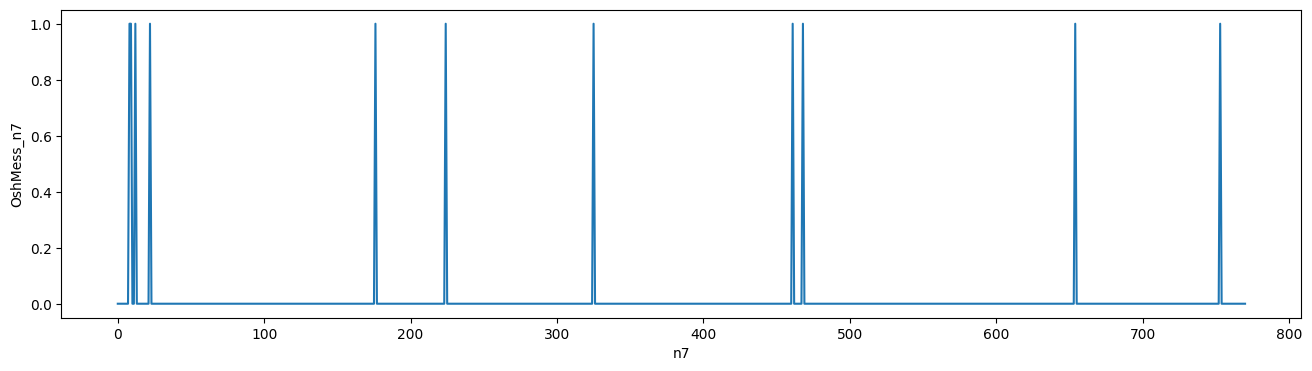

In [20]:
plt.figure(figsize=(16, 4))
plt.plot(list(n7), [osh_mess[i] for i in n7])
plt.ylabel("OshMess_n7")
plt.xlabel("n7")

Text(0.5, 0, 'n6')

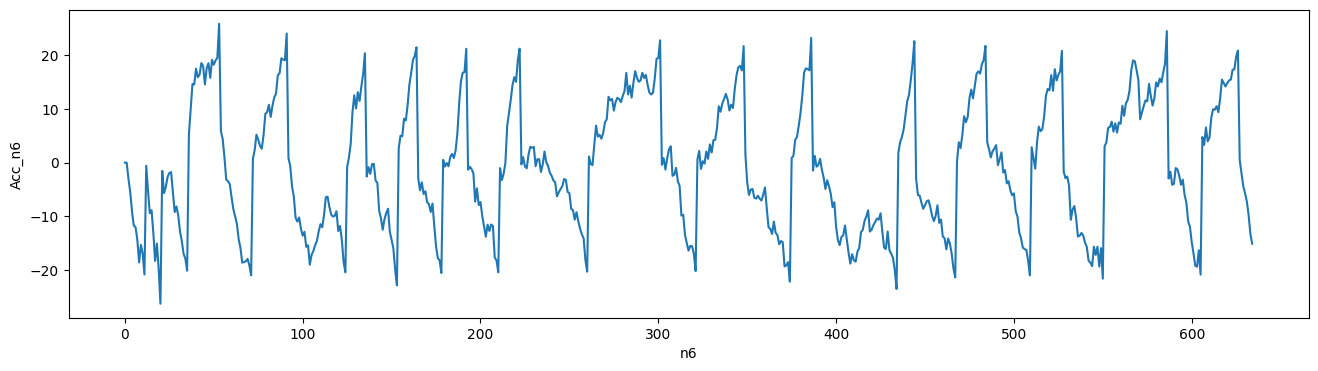

In [21]:
plt.figure(figsize=(16, 4))
plt.plot(list(n6), [acc[i] for i in n6])
plt.ylabel("Acc_n6")
plt.xlabel("n6")

In [22]:
def cadrsyn(x): 
    global A4F2
    c = [i * 2 - 1 for i in a4f2]
    x = [i * 2 - 1 for i in x]
    mx = 0

    zx = []

    ks = 0
    mx = 0
    obrwork = 0
    for i in range(15, len(x) - 1):
        zx.append(sum([c[m] * x[i - len(c) + 1 + m] for m in range(0, len(c))]))
        if abs(zx[-1]) > mx:
            ks = i + 1
            mx = abs(zx[-1])
            obrwork = np.sign(zx[-1])
    return ks, mx, obrwork, zx

In [28]:
mess_kon = cadrsyn(det)
#print(mess_kon)

In [24]:
ks = mess_kon[0]
z = mess_kon[3]

mass_kon = mcad.submatrix(det, ks, ks + N - 1, 0, 0)

print(mass)

[1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1]


In [26]:
osh_kon = sum([m_k ^ m for m_k, m in zip(mass_kon, mass)])
print(f"Количество ошибок: {osh_kon}")

Количество ошибок: 2
